In [30]:
from __future__ import annotations
import polars as pl

dirty = pl.read_csv("data/GCM_Total.res", separator="\t", truncate_ragged_lines=True)

print(dirty.head(5)) # We can see that the data is not correctly formatted

print(dirty.columns) # We need to clean up the column names because they do not correctly reflect the data
                     # E.g. "A lot of "duplicated" should represent the state of the mutation so we rename it to contain its tissues name
                     # _duplicated0 to Tumor__Breast_Adeno_09-B_003A_class

shape: (5, 563)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ Descriptio ┆ Accession  ┆ Tumor__Bre ┆      ┆ … ┆ _duplicate ┆ Normal__C ┆ _duplicat ┆ _duplicat │
│ n          ┆ ---        ┆ ast_Adeno_ ┆ ---  ┆   ┆ d_277      ┆ erebellum ┆ ed_278    ┆ ed_279    │
│ ---        ┆ str        ┆ 09-B_003A  ┆ str  ┆   ┆ ---        ┆ _Brain_Nc ┆ ---       ┆ ---       │
│ str        ┆            ┆ ---        ┆      ┆   ┆ str        ┆ er_S-…    ┆ str       ┆ str       │
│            ┆            ┆ f64        ┆      ┆   ┆            ┆ ---       ┆           ┆           │
│            ┆            ┆            ┆      ┆   ┆            ┆ i64       ┆           ┆           │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ null       ┆ null       ┆ null       ┆ null ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│ AFFX-BioB- ┆ AFFX-BioB- ┆ -64.3      ┆ A    ┆ … ┆ A          ┆ -90       

In [31]:
def clean_column_names(data:pl.DataFrame) -> pl.DataFrame:
    new_columns = []
    for i, col in enumerate(data.columns):
        if "duplicated" in col:
            new_col = f"{data.columns[i-1]}_class"
        elif col == '':
            new_col = f"{data.columns[i-1]}_class"
        else:
            new_col = col
        new_columns.append(new_col)

    data.columns = new_columns
    
    print(data.head(5))
    return data

ds = clean_column_names(dirty)

shape: (5, 563)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Descripti ┆ Accession ┆ Tumor__Br ┆ Tumor__Br ┆ … ┆ Normal__C ┆ Normal__C ┆ Normal__C ┆ _duplica │
│ on        ┆ ---       ┆ east_Aden ┆ east_Aden ┆   ┆ erebellum ┆ erebellum ┆ erebellum ┆ ted_278_ │
│ ---       ┆ str       ┆ o_09-B_00 ┆ o_09-B_00 ┆   ┆ _Brain_Nc ┆ _Brain_Nc ┆ _Brain_Nc ┆ class    │
│ str       ┆           ┆ 3A        ┆ 3A_cl…    ┆   ┆ er_S-…    ┆ er_S-…    ┆ er_S-…    ┆ ---      │
│           ┆           ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ str      │
│           ┆           ┆ f64       ┆ str       ┆   ┆ str       ┆ i64       ┆ str       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ null      ┆ null      ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ null      ┆ null     │
│ AFFX-BioB ┆ AFFX-BioB ┆ -64.3     ┆ A         ┆ … ┆ A         ┆ -90      

From the research paper we derive the information that M = Malignant
A = Benign
P = Pre-cancerous

Top 10 genes with the most M states in tissues:
shape: (10, 2)
┌─────────────────┬──────────┐
│ Accession       ┆ M_states │
│ ---             ┆ ---      │
│ str             ┆ i64      │
╞═════════════════╪══════════╡
│ AFFX-BioB-5_at  ┆ 0        │
│ AFFX-BioB-M_at  ┆ 0        │
│ AFFX-BioB-3_at  ┆ 0        │
│ AFFX-BioC-5_at  ┆ 0        │
│ AFFX-BioC-3_at  ┆ 0        │
│ AFFX-BioDn-5_at ┆ 0        │
│ AFFX-BioDn-3_at ┆ 0        │
│ AFFX-CreX-5_at  ┆ 0        │
│ AFFX-CreX-3_at  ┆ 0        │
│ AFFX-BioB-5_st  ┆ 0        │
└─────────────────┴──────────┘
Top 10 genes with the most M states in tissues:
shape: (10, 2)
┌────────────────┬──────────┐
│ Accession      ┆ M_states │
│ ---            ┆ ---      │
│ str            ┆ i64      │
╞════════════════╪══════════╡
│ L18983_at-2    ┆ 71       │
│ L18983_at      ┆ 71       │
│ RC_AA437323_at ┆ 49       │
│ X16260_s_at-2  ┆ 48       │
│ X16260_s_at    ┆ 48       │
│ RC_AA059386_at ┆ 47       │
│ X91504_at      ┆ 47       │
│ RC_AA609213_at ┆

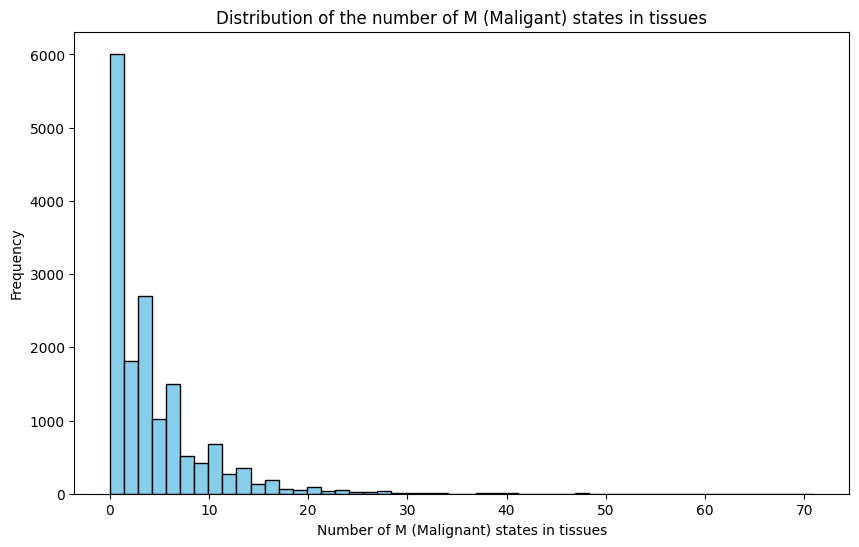

In [5]:
# create new df with the Accession of the mutation, and the number of M states in tissues (columns like 'Tumor__Breast_Adeno_09-B_003A_class')
# then plot the distribution of the number of M states in tissues

classes = [col for col in ds.columns if "class" in col]
mutations_df = ds.select(["Accession"] + classes)

# add a new column called M_states that contains the number of M states in the tissues

mutations_df = mutations_df.with_columns(pl.Series("M_states", mutations_df.map_rows(lambda s: sum([1 for i in s if i == "M"]))))

# print the least M states
summed = mutations_df.sort("M_states").head(10).select(["Accession", "M_states"])
print(f"Top 10 genes with the most M states in tissues:\n{summed}")

# print the most M states
summed = mutations_df.sort("M_states").reverse().head(10).select(["Accession", "M_states"])
print(f"Top 10 genes with the most M states in tissues:\n{summed}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mutations_df["M_states"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Number of M (Malignant) states in tissues")
plt.ylabel("Frequency")
plt.title("Distribution of the number of M (Maligant) states in tissues")
plt.show()

: 